 FRED 주요 경기 선행 지표

* source : https://github.com/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20FRED%20%EA%B2%BD%EA%B8%B0%20%EC%84%A0%ED%96%89%20%EC%A7%80%ED%91%9C.ipynb

In [1]:
# matplotlib 설정
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [2]:
!pip install -q finance-dataReader

In [4]:
import FinanceDataReader as fdr

In [6]:
df=fdr.DataReader('NASDAQCOM',data_source='fred')
df

,NASDAQCOM
DATE,
1971-02-05,100.00
1971-02-08,100.84
1971-02-09,100.76
1971-02-10,100.69
1971-02-11,101.45
...,...
2021-02-10,13972.53
2021-02-11,14025.77
2021-02-12,14095.47


<AxesSubplot:xlabel='DATE'>

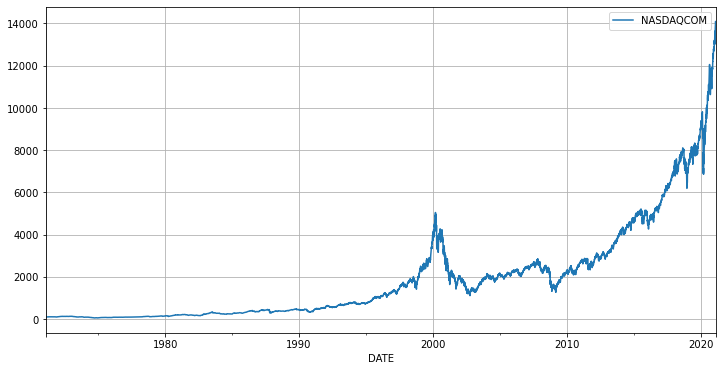

In [7]:
df.plot()

올해(2020년) 팬데믹이후 나스닥은 최고의 상승세를 이어가고 있지만 9월에 조정을 받았다.
9월의 가격 흐름이 일시적인 조정이니지 혹은 폭락의 시작인지 궁금하다.

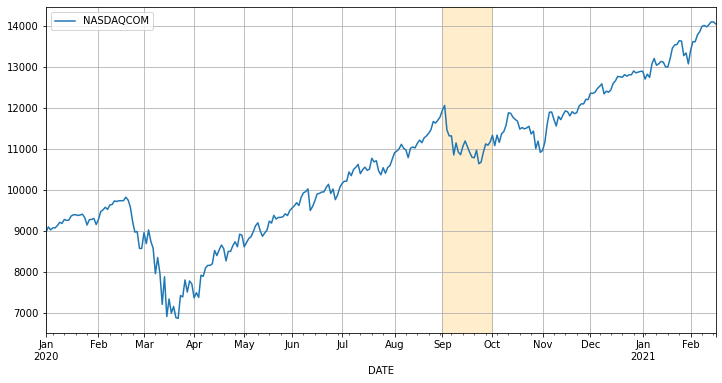

In [9]:
ax=df['2020':].plot()
ax=ax.axvspan('2020-09-01','2020-10-01',color='orange',alpha=0.2)

선행지표란 경기가 좋아질 것인지 혹은 나빠질 것인지 앞서 반응하는 지표를 말합니다. 대표적인 선행 지표들이 무엇이 있는지 그리고, 이 선행지표들을 살펴봄으로 향후 주식 시장의 흐름을 가늠해 볼 수 있습니다. 

## 주간 실업수당 청구 건수(ICSA)

https://fred.stlouisfed.org/series/ICSA

요즘 미국 경기를 이야기 할 때 뉴스에 가장 많이 등장하는 지표중의 하나입니다. 주단위 신규 실업수당청구 건수 입니다.

참고로 연속 실업수당청구 건수 CCSA도 있습니다. 

경기가 나빠지는 경우는 후행지표로 동작하지만, 경기가 좋아 지는 경우 선행 지표로 활용할 수 있습니다. 2008년 금융위기 때는 약간 후행하는 모습을 보이고 있습니다. 

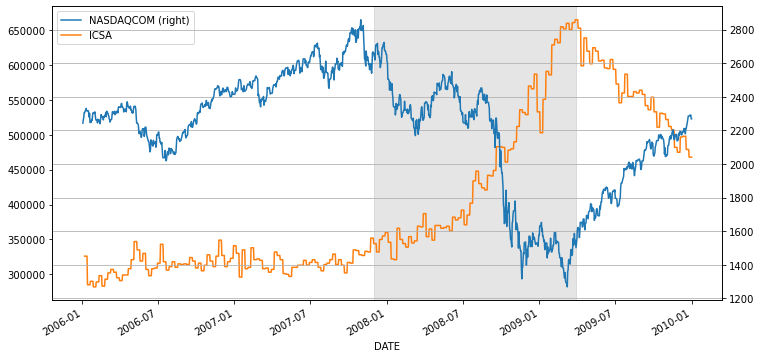

In [11]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 주간 실업수당 청구 건수(ICSA)

df=fdr.DataReader(['NASDAQCOM','ICSA'],start='2006',end='2010',data_source='fred')
ax=df.plot(secondary_y='NASDAQCOM')
ax=ax.axvspan('2007-12-01','2009-03-30',color='gray',alpha=0.2)

최근 주간 실업수당 청구 건수는 꾸준히 감소하여 펜데믹 이후 최저를 기록하고 있습니다. 

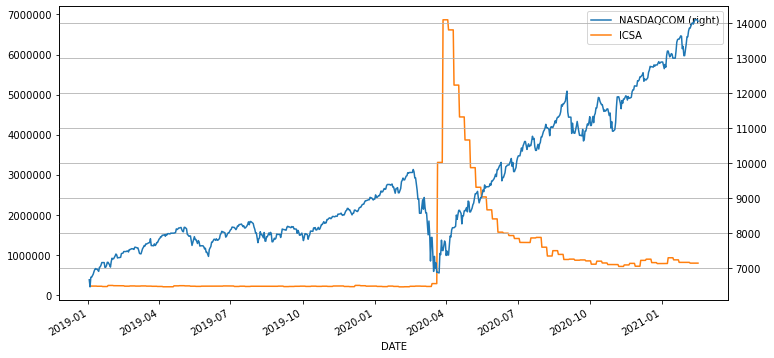

In [13]:
# 최근 (2020년 10월), 나스닥지수(NASDAQCOM)와 주간 실업수당 청구 건수(ICSA)

df=fdr.DataReader(['NASDAQCOM','ICSA'],start='2019',data_source='fred')
ax=df.plot(secondary_y='NASDAQCOM')

In [14]:
df.tail()

,NASDAQCOM,ICSA
DATE,,
2021-02-10,13972.53,793000.0
2021-02-11,14025.77,793000.0
2021-02-12,14095.47,793000.0
2021-02-15,14095.47,793000.0
2021-02-16,14047.50,793000.0


## 소비자 심리지수(UMCSENT)

https://fred.stlouisfed.org/series/UMCSENT

UMCSENT (University of Michigan: Consumer Sentiment)는 미시건대 소비자심리지수 추이로 소비자심리지수(CSI, Consumer Sentiment Index)는 소비자에 설문 결과를 수치화한 지표 입니다.

100을 기준으로 100이상이면 긍정적 100이하면 부정적으로 봅니다. 100이상이면 즉, 긍정적이면 소매업 유리하겠죠.

2008년 금융위기 주가 하락이 본격화 되기 전에 소비자 심리지수(CSI)가 먼저 하락하는 것이 또렷하게 볼 수 있습니다. 

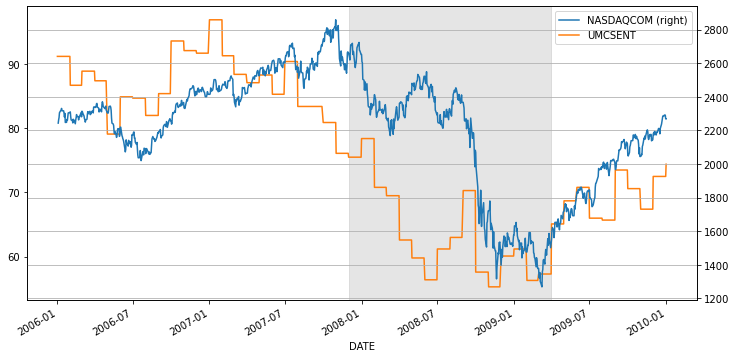

In [17]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 미시건대 소비자 심리지수(UMCSENT)

df=fdr.DataReader(['NASDAQCOM','UMCSENT'],start='2006',end='2010',data_source='fred')
ax=df.plot(secondary_y='NASDAQCOM')
ax=ax.axvspan('2007-12-01','2009-03-30',color='gray',alpha=0.2)

In [25]:
df=fdr.DataReader('UMCSENT',data_source='fred')
df.tail()

,UMCSENT
DATE,
2020-08-01,74.1
2020-09-01,80.4
2020-10-01,81.8
2020-11-01,76.9
2020-12-01,80.7


최근(2020년 12월) 소비자 심리지수(CSI)는 80 부근에서 회복되지 않고 있습니다. 

소비자 심리지수는 경기에 대해 다소 부정적인 신호를 주고 있습니다. 

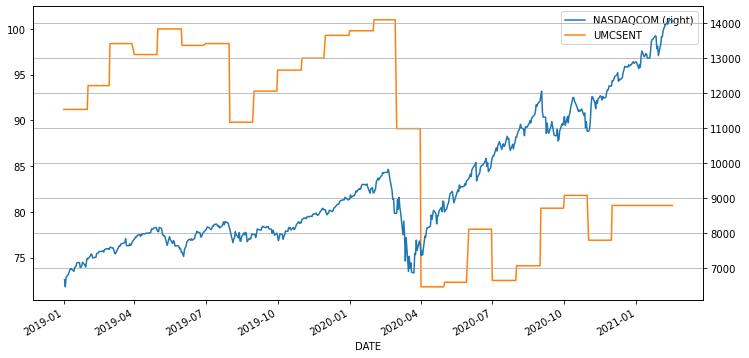

In [26]:
#최근 (2020년 12월), 나스닥지수(NASDAQCOM)와 미시건대 소비자심리지수(UMSCSENT)

df=fdr.DataReader(['NASDAQCOM','UMCSENT'],start='2019',data_source='fred')
ax=df.plot(secondary_y='NASDAQCOM')

In [27]:
df.tail()

,NASDAQCOM,UMCSENT
DATE,,
2021-02-10,13972.53,80.7
2021-02-11,14025.77,80.7
2021-02-12,14095.47,80.7
2021-02-15,14095.47,80.7
2021-02-16,14047.50,80.7


## 주택 판매 지수(HSN1F)

https://fred.stlouisfed.org/series/HSN1F

주택 판매 지수는 주택시장 활성화 정도를 나타냅니다. 불황으로 주가가 하락할 때 하락에 앞서 주택 판매 지수가 하락하는 모습을 보입니다. 

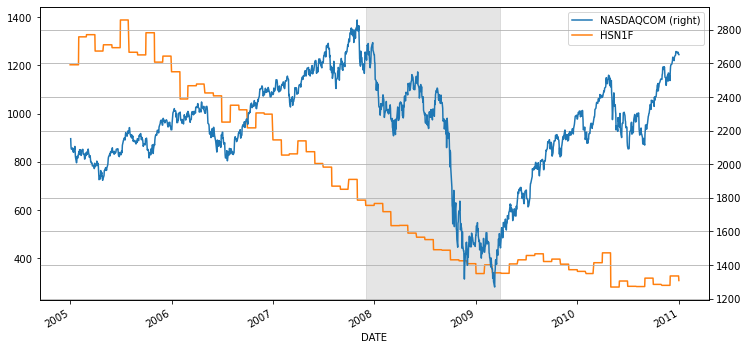

In [29]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 주택 판매 지수

df=fdr.DataReader(['NASDAQCOM','HSN1F'],start='2005',end='2011',data_source='fred')
ax=df.plot(secondary_y='NASDAQCOM')
ax=ax.axvspan('2007-12-01','2009-03-30',color='gray',alpha=0.2)

최근 주택판매지수는 팬데믹 이후 반등하는 모습을 보이고 있습니다. 

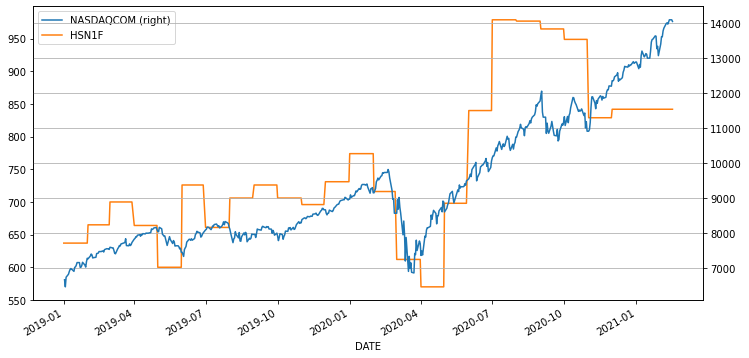

In [33]:
#최근(2021년 2월),나스닥지수(NASDAQCOM)와 주택판매지수(HSN1F)

df=fdr.DataReader(['NASDAQCOM','HSN1F'],start='2019',data_source='fred')
ax=df.plot(secondary_y='NASDAQCOM')

## 실업률

https://fred.stlouisfed.org/series/UNRATE

실업률은 불황에는 후행지표, 경기회복에 동행지표로 작동합니다.

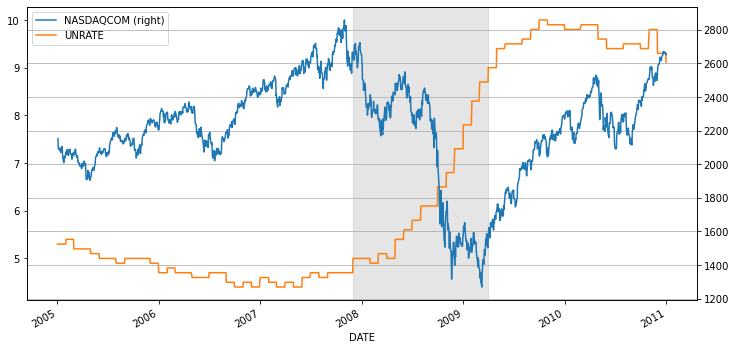

In [34]:
#2008년 금융위기 나스닥지수(NASDAQCOM)와 실업률(UNRATE)

df = fdr.DataReader(['NASDAQCOM', 'UNRATE'], start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

실업률(UNRATE)은 팬데믹 이후 지속적으로 낮아지고 있습니다. 

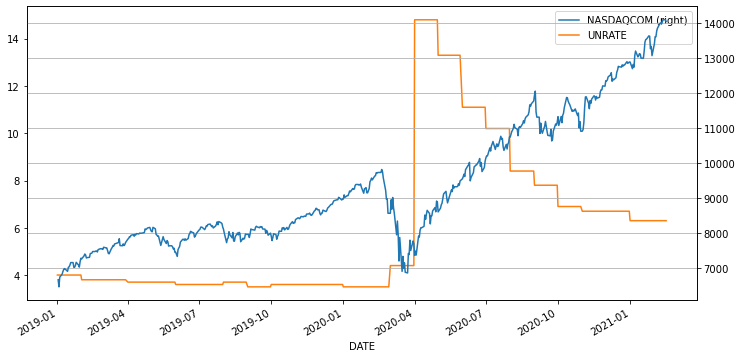

In [36]:
#최근(2021년 2월), 나스닥지수(NASDAQCOM)와 실업률(UNRATE)

df=fdr.DataReader(['NASDAQCOM','UNRATE'],start='2019',data_source='fred')
ax=df.plot(secondary_y='NASDAQCOM')

## M2 통화량

https://fred.stlouisfed.org/series/M2

M2 통화량은 시중 돈이 얼마나 많이 풀렸는지(유동성)을 보여주는 지표입니다.

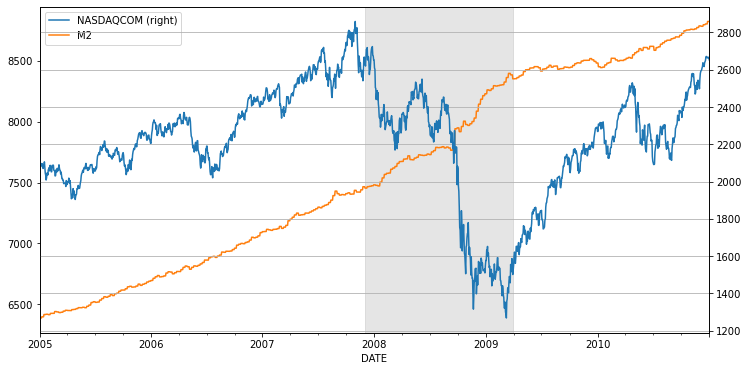

In [37]:
#2008년 금융위기, 나스닥지수(NASDAQCOM)와 M2통화량(M2)

df=fdr.DataReader(['NASDAQCOM','M2'],start='2005',end='2011',data_source='fred')
ax=df.plot(secondary_y='NASDAQCOM')
ax=ax.axvspan('2007-12-01','2009-03-30',color='gray',alpha=0.2)

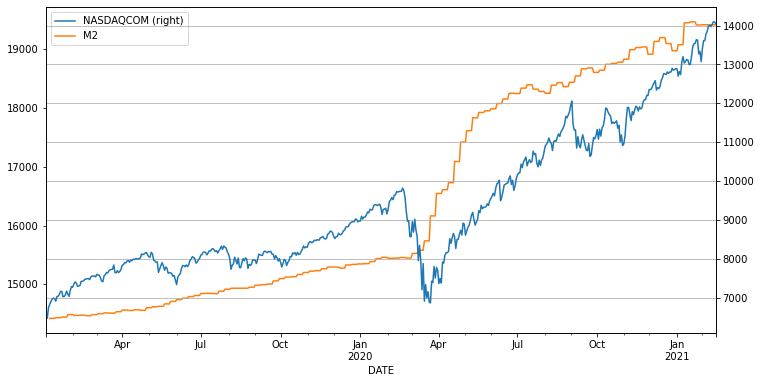

In [38]:
#최근(2021년 2월), 나스닥지수(NASDAQCOM)와 M2통화량(M2)

df=fdr.DataReader(['NASDAQCOM','M2'],start='2019',data_source='fred')
ax=df.plot(secondary_y='NASDAQCOM')

## 하이일드 채권 스프레드(BAMLH0A0HYM2)

https://fred.stlouisfed.org/series/BAMLH0A0HYM2
    
하이일드 채권은 낮은 신용등급 회사에 투자하는 고위험,고수익 채권입니다. 여기서 스프레드는 국채 수익률과의 차이를 이야기합니다. 

하이일드 채권 스프레드 = 하이일드 채권 수익률-국채 수익률

불활일 수록 하이일드 채권 스프레드는 더 커집니다.

FRED에서 'ICE BofA US High Yield Index Option-Adjusted Spread'라는 하이일드 채권 스프레드 데이터를 제공합니다.

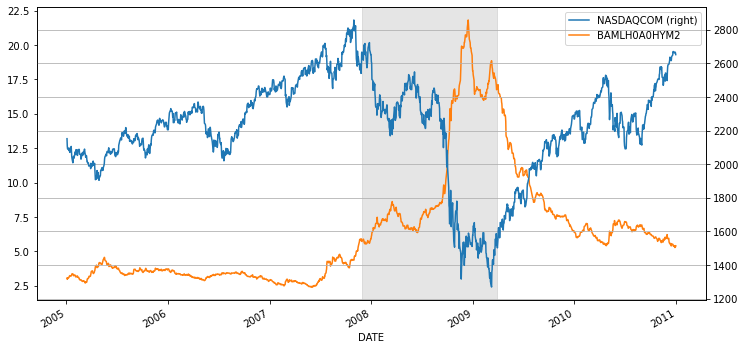

In [39]:
#2008년 금융위기, 나스닥지수(NASDAQCOM)와 하이일드 채권 스프레드(BAMLH0A0HYM2)

df=fdr.DataReader(['NASDAQCOM','BAMLH0A0HYM2'],start='2005',end='2011',data_source='fred')
ax=df.plot(secondary_y='NASDAQCOM')
ax=ax.axvspan('2007-12-01','2009-03-30',color='gray',alpha=0.2)

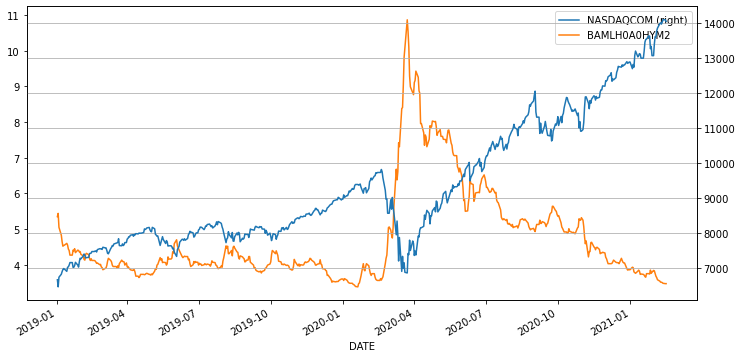

In [40]:
#최근(2021년 2월), 나스닥지수(NASDAQCOM)와 하이일드 채권 스프레드(BAMLH0A0HYM2)

df=fdr.DataReader(['NASDAQCOM','BAMLH0A0HYM2'],start='2019',data_source='fred')
ax=df.plot(secondary_y='NASDAQCOM')

결론
1. 주간 실업수당 청구 건수 (ICSA) : 긍정적(지속 하락)
2. 소비자 심리지수 (UMCSENT) : 부정적(하락)
3. 주택판매지수 (HSN1F) : 긍정적(지속 상승)
4. 실업률 (UNRATE) : 긍정적(지속 하락)
5. M2통화량(M2) : 긍정적(지속 상승)
6. 하이일드 채권 스프레드 (BAMLH0A0HYM2): 긍정적(지속 하락)